In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_1219.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_1350.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_6378.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_1494.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_907.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_730.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_697.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_1476.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_700.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_8807.jpg
/kaggle/input/satellite-images-of-water-bodies/Water B

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
import random
import glob

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Data Preprocessing

In [3]:
image_path = "/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/*.jpg"
mask_path = "/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Masks/*.jpg"



image_paths = sorted(glob.glob(image_path), key=lambda x: x.split('.')[0])
mask_paths = sorted(glob.glob(mask_path), key=lambda x: x.split('.')[0])

Have to resize it to (128,128,3) so that it can better fit with the unet model



In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_image(image, size):
    # Resize the image to the specified size
    resized_image = cv2.resize(image, size)
    return resized_image

def resize_mask(mask, size):
    # Convert the mask to grayscale
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)

    # Resize the mask to the specified size
    resized_mask = cv2.resize(mask_gray, size, interpolation=cv2.INTER_NEAREST)
    resized_mask = np.expand_dims(resized_mask, axis=2)
    return resized_mask



# Define the desired size
target_size = (128,128)

image_list = []
mask_list = []

for image_path, mask_path in zip(image_paths, mask_paths):
    # Load the image and mask
    image = plt.imread(image_path).astype(np.float32) / 255.
    mask = plt.imread(mask_path).astype(np.float32) / 255.

    # Resize the image and mask
    resized_image = resize_image(image, target_size)
    resized_mask = resize_mask(mask, target_size)

    image_list.append(resized_image)
    mask_list.append(resized_mask)

# Convert the image and mask lists to arrays
image_array = np.array(image_list)
mask_array = np.array(mask_list)

# Check the shapes of the resized image and mask arrays
print("Resized image array shape:", image_array.shape)
print("Resized mask array shape:", mask_array.shape)


Resized image array shape: (2841, 128, 128, 3)
Resized mask array shape: (2841, 128, 128, 1)


# plotting images and mask labels

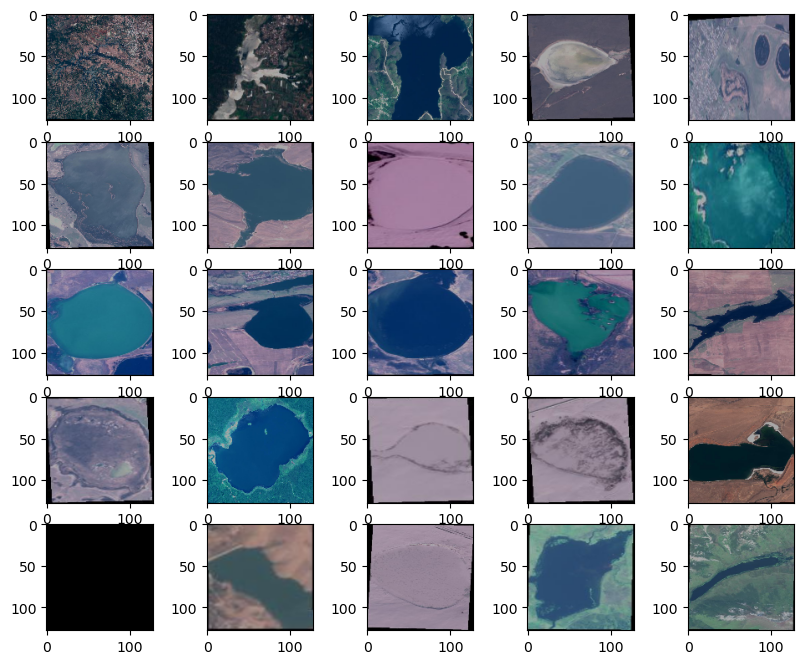

In [6]:

def show_img(img, nrows=5, ncols=5, figsize=(10, 8)):
  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  id_img = 0
  for i in range(nrows):
    for j in range(ncols):
      ax[i][j].imshow(img[id_img])
      id_img += 1


show_img(image_array)

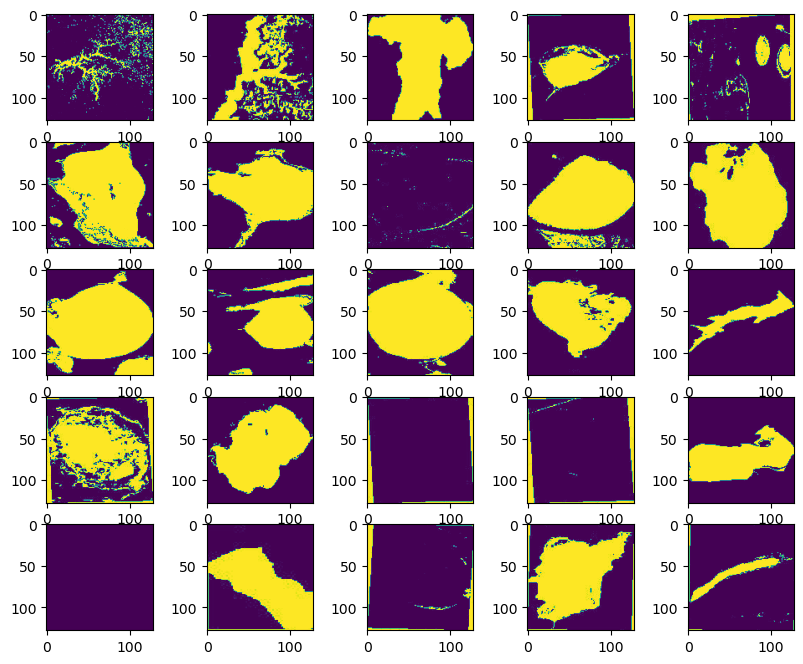

In [7]:
show_img(mask_array)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_array,mask_array, test_size=0.2, random_state=23)

# Model Building 



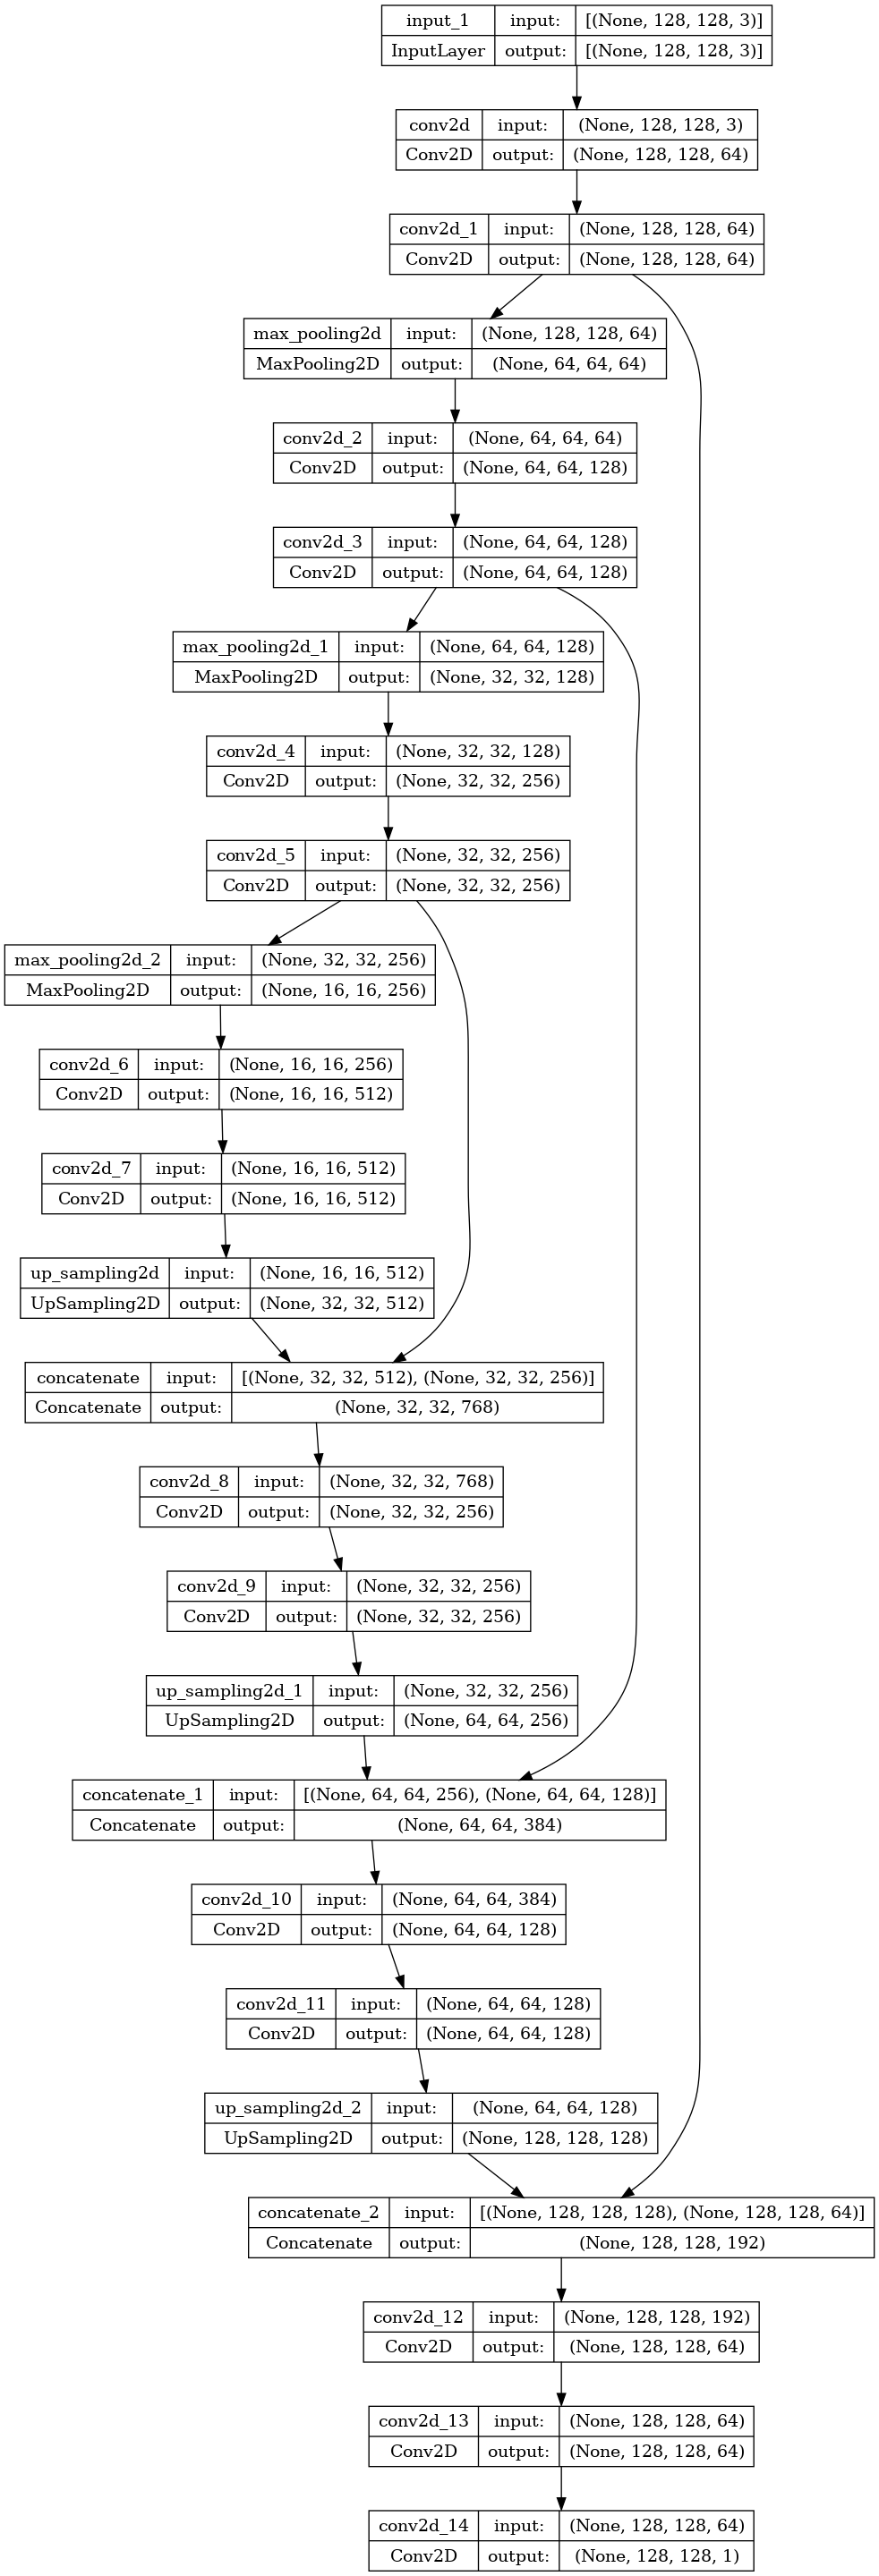

In [9]:
import tensorflow as tf  

# Define input  
x = tf.keras.layers.Input((128, 128, 3))  

# Encoder  
enc1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)  
enc2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc1)  
enc3 = tf.keras.layers.MaxPooling2D((2, 2))(enc2)  

enc4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(enc3)  
enc5 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(enc4)  
enc6 = tf.keras.layers.MaxPooling2D((2, 2))(enc5)  

enc7 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(enc6)  
enc8 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(enc7)  
enc9 = tf.keras.layers.MaxPooling2D((2, 2))(enc8)  

# Bottleneck  
bottleneck = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(enc9)  
bottleneck = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(bottleneck)  

# Decoder  
dec1 = tf.keras.layers.UpSampling2D((2, 2))(bottleneck)  
dec1 = tf.keras.layers.Concatenate()([dec1, enc8])  # Skip connection from enc8  
dec1 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(dec1)  
dec1 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(dec1)  

dec2 = tf.keras.layers.UpSampling2D((2, 2))(dec1)  
dec2 = tf.keras.layers.Concatenate()([dec2, enc5])  # Skip connection from enc5  
dec2 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(dec2)  
dec2 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(dec2)  

dec3 = tf.keras.layers.UpSampling2D((2, 2))(dec2)  
dec3 = tf.keras.layers.Concatenate()([dec3, enc2])  # Skip connection from enc2  
dec3 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(dec3)  
dec3 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(dec3)  

# Output layer  
output = tf.keras.layers.Conv2D(1, (1, 1), padding='same', activation='sigmoid')(dec3)  

# Create model  
model = tf.keras.Model(inputs=x, outputs=output)  

# Display model summary  
tf.keras.utils.plot_model(model, show_shapes=True)

# Model Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# early_stopping_cb = EarlyStopping(patience=5,restore_best_weights=True)
model_checkpoint_cb = ModelCheckpoint("/kaggle/working/watermodel.h5",save_best_only=True)
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=16, epochs=30,validation_data=(X_test, y_test))







Epoch 1/30
  5/142 [>.............................] - ETA: 27:41 - loss: 1.9791 - accuracy: 0.5298

# Accuracy check

In [ ]:
plt.plot(history.history['accuracy'],color='blue',label='training accuracy')
plt.plot(history.history['val_accuracy'],color='red',label='Testing accuracy')
plt.legend()
plt.show()

# loss check

In [ ]:
plt.plot(history.history['loss'],color='blue',label='training loss')
plt.plot(history.history['val_loss'],color='red',label='Testing loss')
plt.legend()
plt.show()

# Model evaluation

In [ ]:
figure, axes = plt.subplots(3,3, figsize=(20,20))

for i in range(0,3):
    rand_num = random.randint(0,100)
    original_img = X_test[rand_num]
    axes[i,0].imshow(original_img)
    axes[i,0].title.set_text('Original Image')
    
    original_mask = y_test[rand_num]
    axes[i,1].imshow(original_mask)
    axes[i,1].title.set_text('Original Mask')
    
    original_img = np.expand_dims(original_img, axis=0)
    predicted_mask = model.predict(original_img).reshape(128,128)
    axes[i,2].imshow(predicted_mask, cmap='gray')
    axes[i,2].title.set_text('Predicted Mask')